In [2]:
#analyse Titatic dataset and prepare a machine learning to predict the passenger survival i.e

In [3]:
#import libarries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#import a library for labelencoding
from sklearn.preprocessing import LabelEncoder
#import library for test split
from sklearn.model_selection import train_test_split
#importing library for performance metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [4]:
#load dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [10]:
#divide the data frames into dependent and independent variables
X = df[["Pclass","Age","Sex","SibSp","Parch","Fare"]]
y = df["Survived"]

In [11]:
#checking the information on X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   Sex     891 non-null    object 
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [12]:
#Handling Missing Value in Age Column
X['Age'] = X['Age'].fillna(X['Age'].mean())

C:\Users\vivek\AppData\Local\Temp\ipykernel_20540\1718278125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(X['Age'].mean())


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Sex     891 non-null    object 
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [14]:
X.head()

,Pclass,Age,Sex,SibSp,Parch,Fare
0,3,22.0,male,1,0,7.2500
1,1,38.0,female,1,0,71.2833
2,3,26.0,female,0,0,7.9250
3,1,35.0,female,1,0,53.1000
4,3,35.0,male,0,0,8.0500


In [15]:
encoder = LabelEncoder()
X["Sex"] = encoder. fit_transform(X["Sex"])

C:\Users\vivek\AppData\Local\Temp\ipykernel_20540\3940119822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = encoder. fit_transform(X["Sex"])


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
#dictionary of model for model setup
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "K–Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

classification report of all the machine learning algorithmn
[[90 16]
 [20 53]]
Summary of the model
                 model  accuracy  precision    Recall   f1score
0  Logistic Regression  0.798883   0.768116  0.726027  0.746479


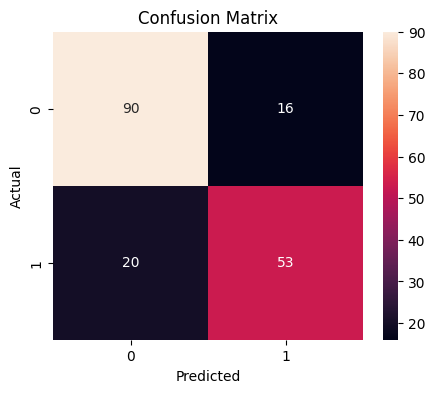

<Figure size 1200x800 with 0 Axes>

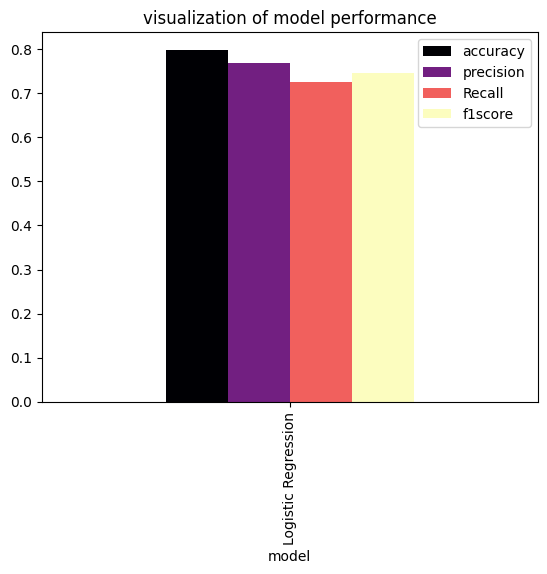

classification report of all the machine learning algorithmn
[[96 10]
 [52 21]]
Summary of the model
                    model  accuracy  precision    Recall   f1score
0     Logistic Regression  0.798883   0.768116  0.726027  0.746479
1  Support Vector Machine  0.653631   0.677419  0.287671  0.403846


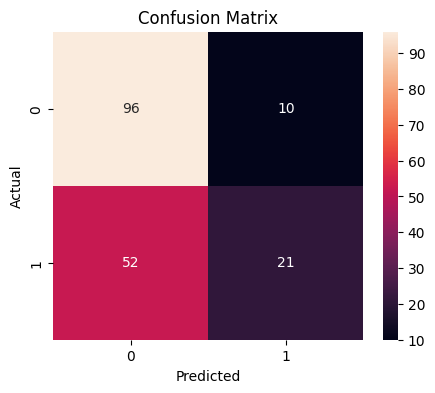

<Figure size 1200x800 with 0 Axes>

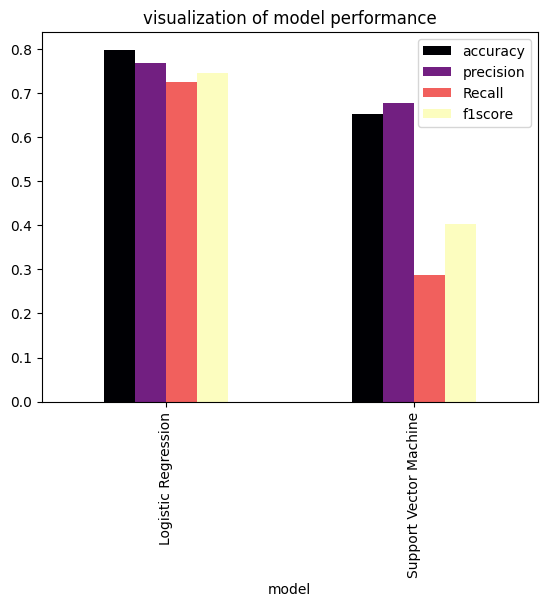

classification report of all the machine learning algorithmn
[[89 17]
 [26 47]]
Summary of the model
                    model  accuracy  precision    Recall   f1score
0     Logistic Regression  0.798883   0.768116  0.726027  0.746479
1  Support Vector Machine  0.653631   0.677419  0.287671  0.403846
2             Naive Bayes  0.759777   0.734375  0.643836  0.686131


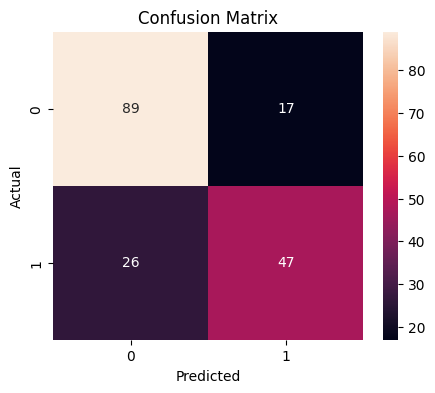

<Figure size 1200x800 with 0 Axes>

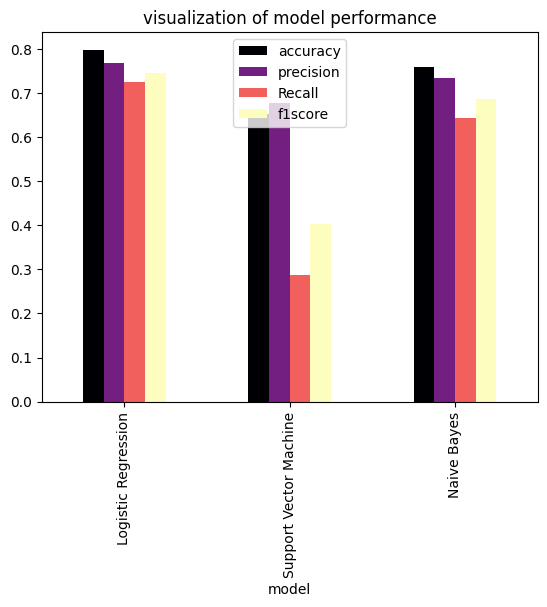

classification report of all the machine learning algorithmn
[[88 18]
 [33 40]]
Summary of the model
                    model  accuracy  precision    Recall   f1score
0     Logistic Regression  0.798883   0.768116  0.726027  0.746479
1  Support Vector Machine  0.653631   0.677419  0.287671  0.403846
2             Naive Bayes  0.759777   0.734375  0.643836  0.686131
3     K–Nearest Neighbors  0.715084   0.689655  0.547945  0.610687


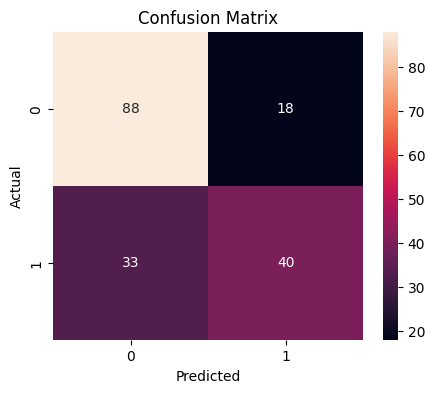

<Figure size 1200x800 with 0 Axes>

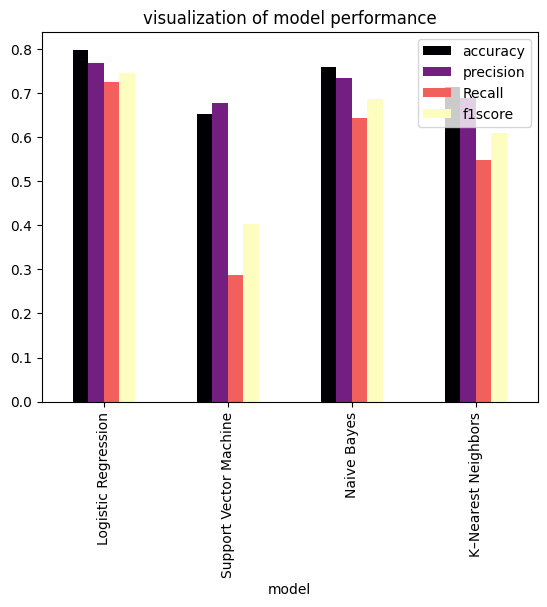

classification report of all the machine learning algorithmn
[[90 16]
 [29 44]]
Summary of the model
                    model  accuracy  precision    Recall   f1score
0     Logistic Regression  0.798883   0.768116  0.726027  0.746479
1  Support Vector Machine  0.653631   0.677419  0.287671  0.403846
2             Naive Bayes  0.759777   0.734375  0.643836  0.686131
3     K–Nearest Neighbors  0.715084   0.689655  0.547945  0.610687
4           Decision Tree  0.748603   0.733333  0.602740  0.661654


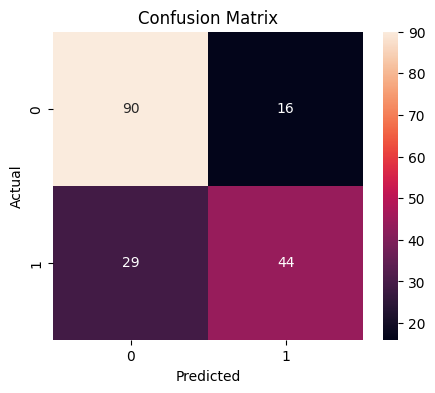

<Figure size 1200x800 with 0 Axes>

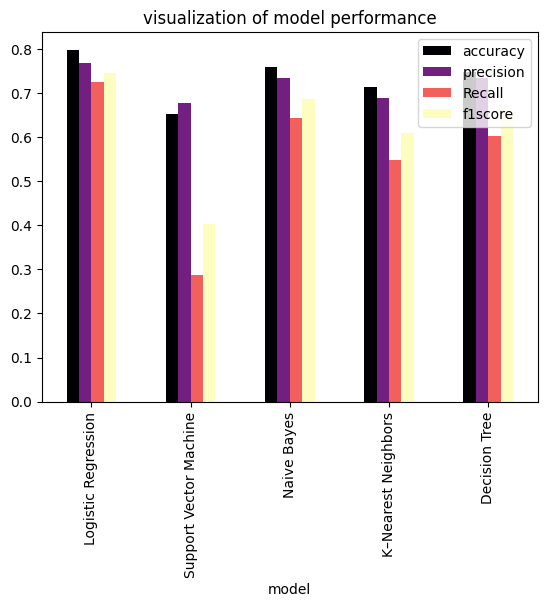

classification report of all the machine learning algorithmn
[[97  9]
 [27 46]]
Summary of the model
                    model  accuracy  precision    Recall   f1score
0     Logistic Regression  0.798883   0.768116  0.726027  0.746479
1  Support Vector Machine  0.653631   0.677419  0.287671  0.403846
2             Naive Bayes  0.759777   0.734375  0.643836  0.686131
3     K–Nearest Neighbors  0.715084   0.689655  0.547945  0.610687
4           Decision Tree  0.748603   0.733333  0.602740  0.661654
5           Random Forest  0.798883   0.836364  0.630137  0.718750


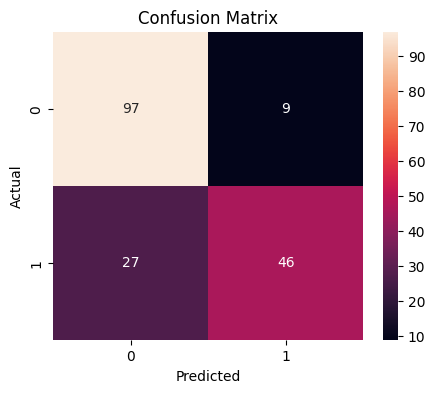

<Figure size 1200x800 with 0 Axes>

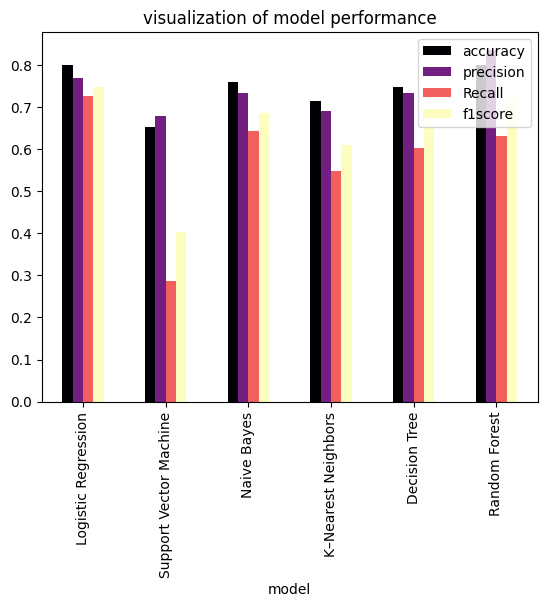

In [18]:
results = []
for name,model in models.items():
  model.fit(X_train,y_train)#train the model
  y_pred = model.predict(X_test)

  print("classification report of all the machine learning algorithmn")

  cm = confusion_matrix(y_test,y_pred)
  print(cm)

  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)

  results.append({
      "model" : name,
      "accuracy" : accuracy,
      "precision" : precision,
      "Recall" : recall,
      "f1score" : f1
      })
  # summary of the model
  results_df = pd.DataFrame(results)
  print("Summary of the model")
  print(results_df)

  #visualize the confusion matrix
  plt.figure(figsize=(5,4))
  sns.heatmap(cm,annot=True)
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

  #visualize the comparission
  plt.figure(figsize=(12,8))
  results_df.set_index("model")[["accuracy","precision","Recall","f1score"]].plot(kind="bar" , cmap = "magma")
  plt.title("visualization of model performance")
  plt.show()

In [19]:
print("Summary of models")
print(results_df)

Summary of models
                    model  accuracy  precision    Recall   f1score
0     Logistic Regression  0.798883   0.768116  0.726027  0.746479
1  Support Vector Machine  0.653631   0.677419  0.287671  0.403846
2             Naive Bayes  0.759777   0.734375  0.643836  0.686131
3     K–Nearest Neighbors  0.715084   0.689655  0.547945  0.610687
4           Decision Tree  0.748603   0.733333  0.602740  0.661654
5           Random Forest  0.798883   0.836364  0.630137  0.718750


In [20]:
import joblib
joblib.dump(model,'titanic_model.pkl')
joblib.dump(encoder,'Label_encoder.pkl')

['Label_encoder.pkl']